In [1]:
import torch
import matplotlib.pyplot as plt

# Noise Schedule

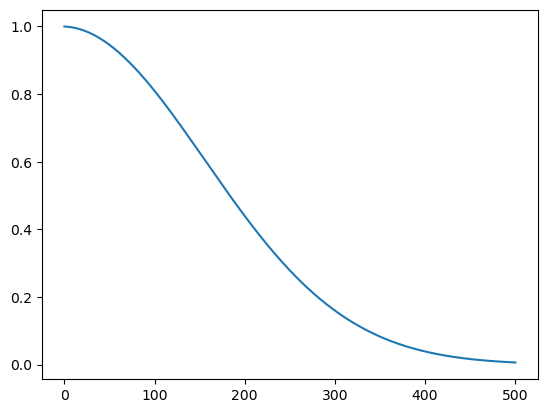

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device('cpu'))

time_steps = 500
beta1 = 1e-4
beta2 = 0.02
b_t = (beta2 - beta1) * torch.linspace(0, 1, time_steps + 1, device=device) + beta1
a_t = 1 - b_t
ab_t = torch.cumsum(a_t.log(), dim=0).exp()
ab_t[0] = 1

plt.plot(ab_t.to('cpu'))
plt.show()

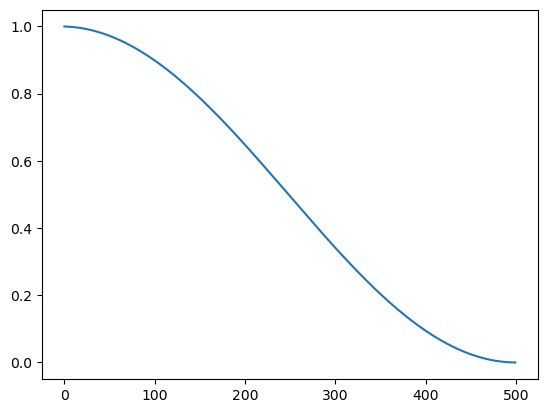

In [27]:
import math
time_steps = 500
s = 0.008
t = torch.arange(time_steps).to(device)
ab_t = torch.cos( (t/time_steps + s)/(1+s) *math.pi/2)**2

plt.plot(ab_t.to('cpu'))
plt.show()

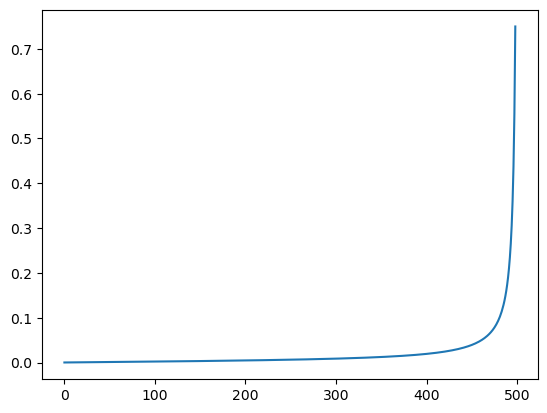

In [28]:
variances = 1 - ab_t[1:]/ab_t[:-1]
plt.plot(variances.cpu())
plt.show()


# Embeddings

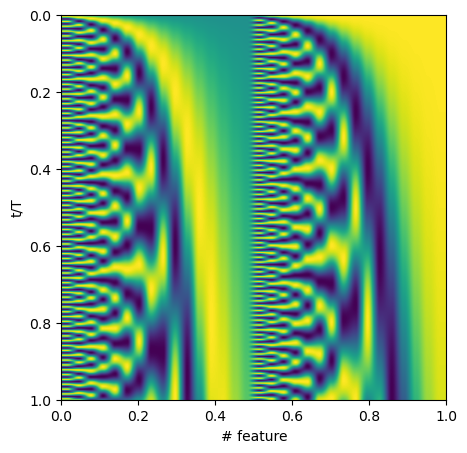

In [20]:
import math
time_steps = 500
emb_dim = 32
time = torch.arange(0,time_steps)
device = time.device
half_dim = emb_dim // 2
embeddings = math.log(1000) / (half_dim - 1)
embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
embeddings = time[:, None] * embeddings[None, :]
embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)

plt.figure(figsize=[5,5])
plt.imshow(embeddings[:,:].to('cpu'), extent=[0,1,1,0])
plt.xlabel('# feature')
plt.ylabel("t/T")
#plt.xlim(0,10)
plt.show()


## Fourier Embeddings

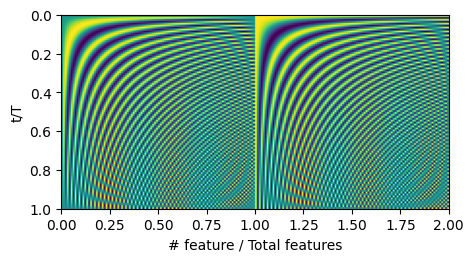

In [50]:

import math
emb_dim = 200
time_steps = 100
time = torch.arange(0,time_steps)
device = time.device
half_dim = emb_dim // 2
freqs = torch.arange(0,half_dim) / half_dim * math.pi
# embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
embeddings = time[:, None]/time_steps*half_dim * freqs[None, :]
embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)


plt.figure(figsize=[5,5])
plt.imshow(embeddings[:,:].to('cpu'), extent=[0,2,1,0])
plt.xlabel('# feature / Total features')
plt.ylabel("t/T")
#plt.xlim(0,10)
plt.show()
